<a href="https://colab.research.google.com/github/ernanibn/reconhecimento_padroes_23/blob/main/desafio_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [119]:
import pandas as pd

train = pd.read_csv('https://raw.githubusercontent.com/dsindy/kaggle-titanic/master/data/train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/dsindy/kaggle-titanic/master/data/test.csv')

# xtr, ytr =

train.columns.isin(test.columns)

Xtr = train.iloc[:, train.columns != 'Survived']
ytr = train.iloc[:, train.columns == 'Survived']
Xte = test


In [120]:
from sklearn.base import BaseEstimator, TransformerMixin

class AtributosDesejados(BaseEstimator, TransformerMixin):
  def fit(self, X, y=None):
    self.colunasIndesejadas = ['PassengerId', 'Name', 'Ticket', 'Cabin']
    return self
  def transform(self, X, y=None):
    return X.drop(self.colunasIndesejadas, axis=1)

atributosDesejados = AtributosDesejados()
Xdrop = atributosDesejados.fit_transform(train)
Xdrop.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [121]:
from sklearn.base import BaseEstimator, TransformerMixin
class AtributosNumericos(BaseEstimator, TransformerMixin):
  def fit(self, X, y=None):
    self.colunasNumericas = X.select_dtypes(include='number').columns
    return self
  def transform(self, X, y=None):
    return X[self.colunasNumericas]
atributosNumericos = AtributosNumericos()
Xnum = atributosNumericos.fit_transform(Xdrop)
Xnum.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [122]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

pipenum = Pipeline([
    ('atributos_numericos', AtributosNumericos()),
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

XnumLimpo = pipenum.fit_transform(Xnum)
XnumLimpo

array([[-0.78927234,  0.82737724, -0.56573646,  0.43279337, -0.47367361,
        -0.50244517],
       [ 1.2669898 , -1.56610693,  0.66386103,  0.43279337, -0.47367361,
         0.78684529],
       [ 1.2669898 ,  0.82737724, -0.25833709, -0.4745452 , -0.47367361,
        -0.48885426],
       ...,
       [-0.78927234,  0.82737724, -0.1046374 ,  0.43279337,  2.00893337,
        -0.17626324],
       [ 1.2669898 , -1.56610693, -0.25833709, -0.4745452 , -0.47367361,
        -0.04438104],
       [-0.78927234,  0.82737724,  0.20276197, -0.4745452 , -0.47367361,
        -0.49237783]])

In [123]:
from sklearn.base import BaseEstimator, TransformerMixin
class AtributosCategoricos(BaseEstimator, TransformerMixin):
  def fit(self, X, y=None):
    self.colunasCategoricas = X.select_dtypes(include='object').columns
    return self
  def transform(self, X, y=None):
    return X[self.colunasCategoricas]

atributosCategoricos = AtributosCategoricos()
Xcat = atributosCategoricos.fit_transform(Xdrop)
Xcat.columns

Index(['Sex', 'Embarked'], dtype='object')

In [124]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

pipecat = Pipeline([
    ('atributos_categoricos', AtributosCategoricos()),
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder())
])

XcatLimpo = pipecat.fit_transform(Xdrop)
XcatLimpo

<891x5 sparse matrix of type '<class 'numpy.float64'>'
	with 1782 stored elements in Compressed Sparse Row format>

In [125]:
from sklearn.pipeline import FeatureUnion

unecaracteristicas = FeatureUnion([
    ('pipenum', pipenum),
    ('pipecat', pipecat)
    ])
Xtratado = unecaracteristicas.fit_transform(Xdrop)
Xtratado

<891x11 sparse matrix of type '<class 'numpy.float64'>'
	with 7128 stored elements in Compressed Sparse Row format>

In [126]:
from sklearn.pipeline import Pipeline
preproc = Pipeline([
    ('atributos_desejados', AtributosDesejados()),
    ('unecaracteristicas', unecaracteristicas)
])

Xtratado = preproc.fit_transform(Xtr)
Xtratado

<891x10 sparse matrix of type '<class 'numpy.float64'>'
	with 6237 stored elements in Compressed Sparse Row format>

In [155]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier


from sklearn.model_selection import cross_validate

import numpy as np

# from sklearn.ensemble import StackingClassifier


# from sklearn.preprocessing import OneHotEncoder
# from sklearn.compose import ColumnTransformer
# ct = ColumnTransformer([('town', OneHotEncoder(), [0])], remainder = 'passthrough')


# voting = StackingClassifier([
#     ('knn', KNeighborsClassifier()),
#     ('naivebayes', GaussianNB()),
#     ('perceptron', Perceptron())
# ])


pipetotal = Pipeline([
    ('preproc', preproc),
    ('randomforest', RandomForestClassifier(n_estimators=100
                                            , max_depth=5
                                            # , criterion='entropy'
                                            ))
])


# parametros = {'randomforest__max_depth': [1,5,9],
#               'randomforest__criterion': ['gini', 'entropy']}

# modelo = GridSearchCV(pipetotal, param_grid=parametros)






In [ ]:
# import numpy as np

# scores = cross_validate(modelo,Xtr, ytr)
# scores, np.mean(scores['test_score'])

In [156]:
# pipetotal.estimator
pipetotal.fit(Xtr, ytr)

ypred = pipetotal.predict(Xte)


/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


In [158]:
submission = pd.read_csv('./sample_data/gender_submission.csv')
# ypred = modelo.predict(test)
submission['Survived'] = ypred
submission.to_csv('my_submission.csv', index=False)

In [159]:
(0.78229-0.65)*125

16.536250000000003

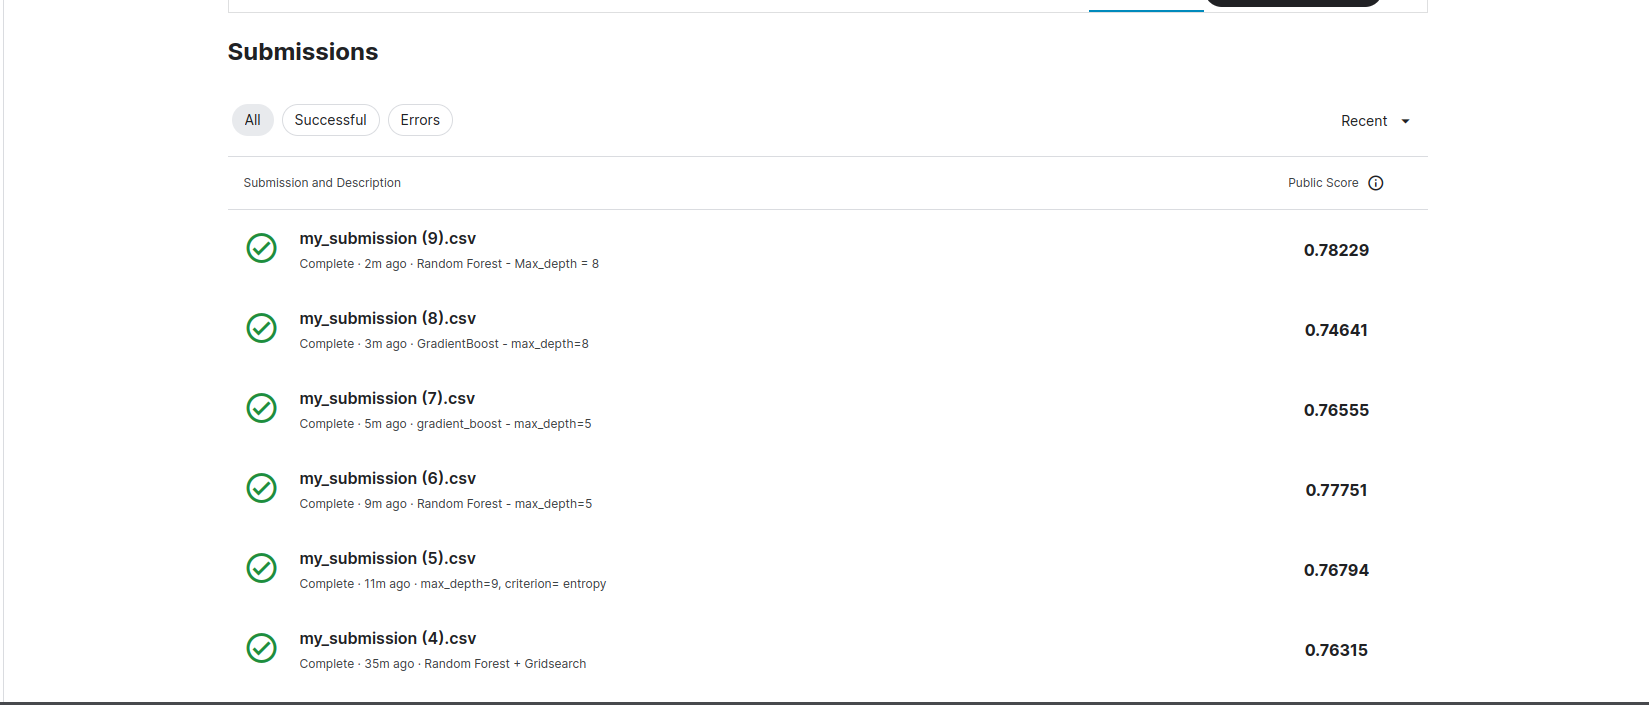